# PCA 
Principal Component Analysis (PCA) is commonly used for dimensionality reduction and visualization.

Change of Base: 
- Transforms the data by changing its basis to highlight key patterns or components.


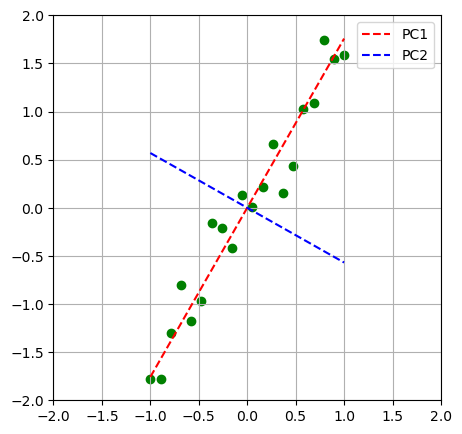

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
plt.figure(figsize=(5,5))
x = np.linspace(-1,1,20)
noise = np.random.randn(20)/3
y = 2*x+noise
y = y-np.mean(y)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(np.stack([x,y]).T)
m1 = pca.components_[0,1]/pca.components_[0,0]
m2 = pca.components_[1,1]/pca.components_[1,0]
y1,y2 = m1*x, m2*x
plt.scatter(x,y,c='g');
plt.plot(x,y1, 'r--', label='PC1')
plt.plot(x,y2, 'b--', label='PC2')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid()
plt.legend();

## Cancer Dataset

In [2]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [3]:
f_names = load_breast_cancer().feature_names

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
# apply min_max_scaler to training and test set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

## PCA and dim=10

In [7]:
# 10 pc
from sklearn.decomposition import PCA
pca_10 = PCA(n_components=10)
pca_10.fit(X_train_scaled)

PCA(n_components=10)

In [8]:
# explained_variance_ratio_
pca_10.explained_variance_ratio_

array([0.51834856, 0.18411207, 0.07009027, 0.0628725 , 0.03973014,
       0.03298706, 0.01540735, 0.01327304, 0.0105223 , 0.00970247])

In [9]:
# cumsum
pca_10.explained_variance_ratio_.cumsum()

array([0.51834856, 0.70246063, 0.7725509 , 0.8354234 , 0.87515355,
       0.90814061, 0.92354796, 0.936821  , 0.9473433 , 0.95704577])

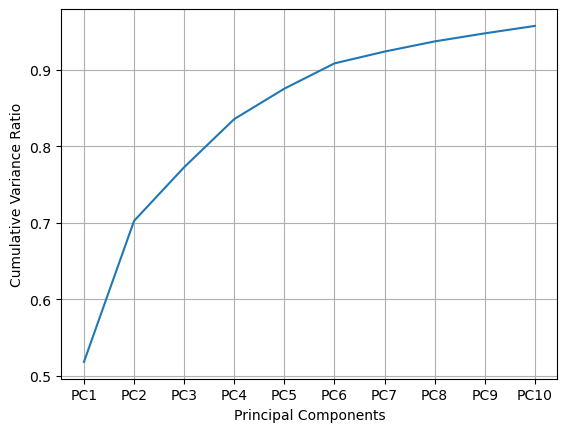

In [10]:
# plot cumsum
import matplotlib.pyplot as plt
x_l = ['PC'+str(i) for i in range(1,11)   ]
plt.plot(x_l, pca_10.explained_variance_ratio_.cumsum())
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.grid()

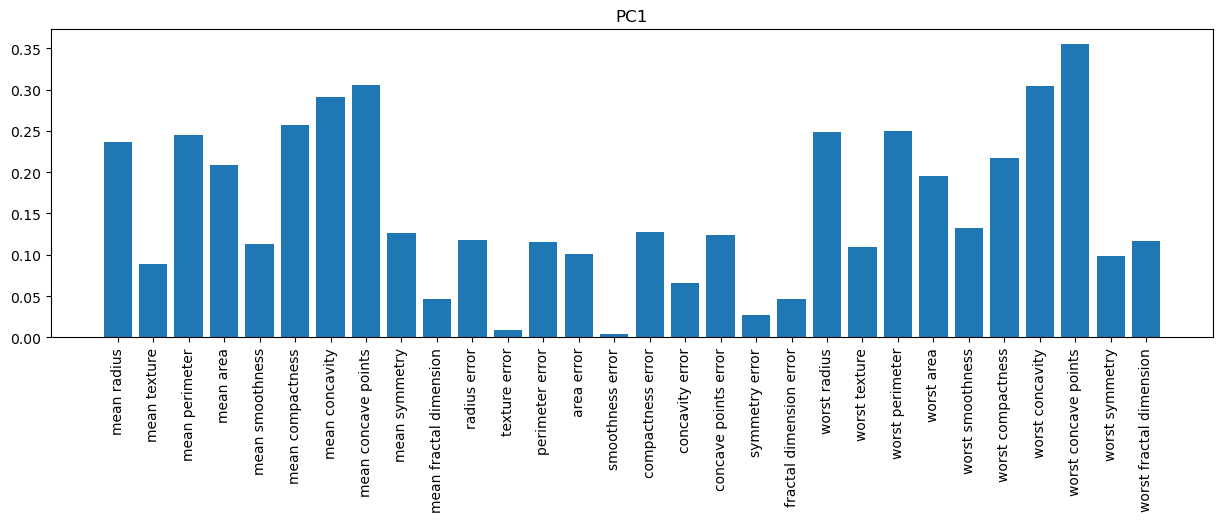

In [11]:
# PC1
plt.figure(figsize=(15,4))
plt.bar(f_names, pca_10.components_[0,:])
plt.title('PC1')
plt.xticks(rotation=90);

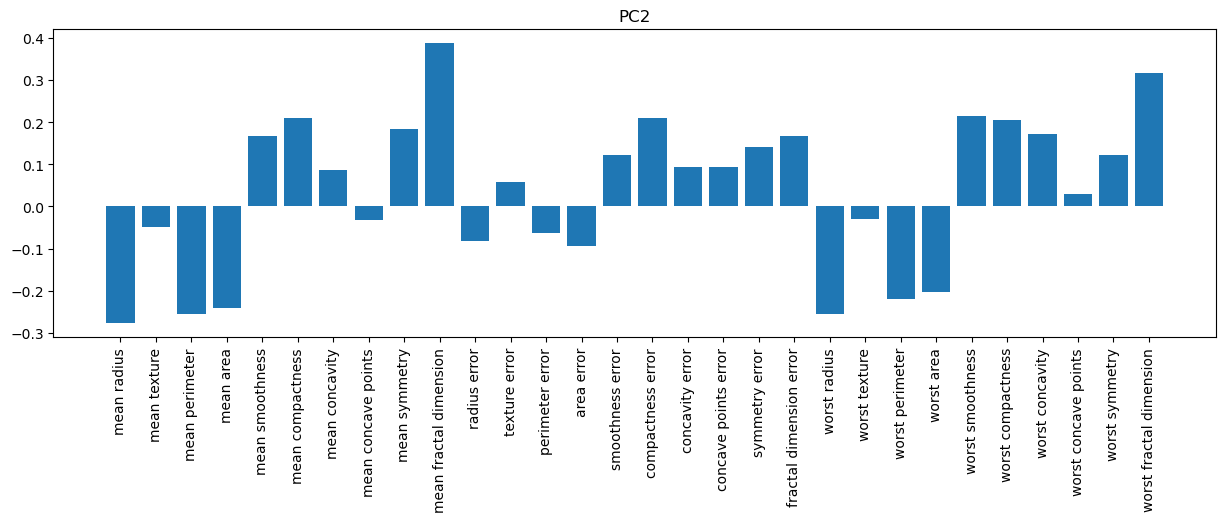

In [12]:
# PC2
plt.figure(figsize=(15,4))
plt.bar(f_names, pca_10.components_[1,:])
plt.title('PC2')
plt.xticks(rotation=90);

## PCA and dim=2

In [13]:
# 2 pc
pca_2 = PCA(n_components=2)
pca_2.fit(X_train_scaled)

PCA(n_components=2)

In [14]:
# transform
X_pca_2 = pca_2.transform(X_train_scaled)
X_pca_2.shape

(426, 2)

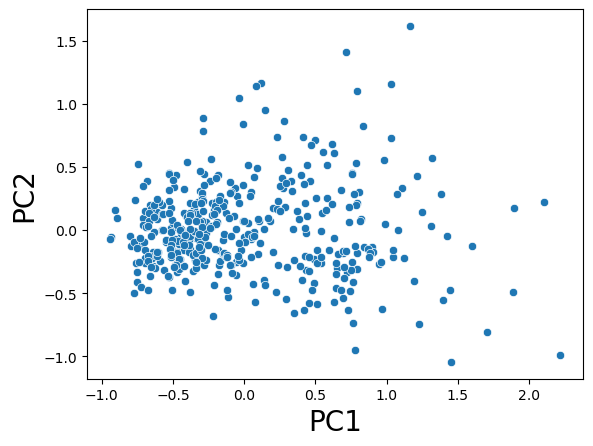

In [19]:
# plot transformed data
import seaborn as sns
sns.scatterplot( x = X_pca_2[:,0], y  = X_pca_2[:,1]   )
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20);

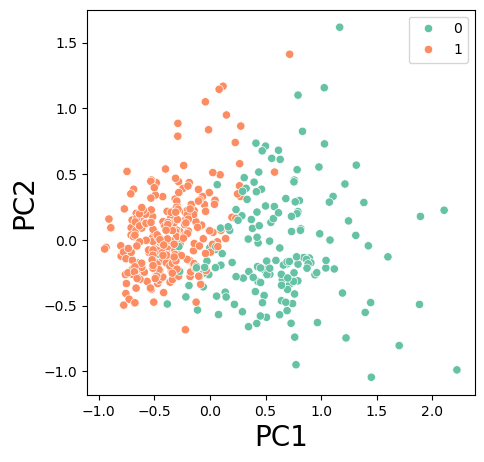

In [16]:
# plot transformed data with hue
plt.figure(figsize=(5,5))
sns.scatterplot( x = X_pca_2[:,0], y  = X_pca_2[:,1], hue = y_train, palette ='Set2'   )
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20);

## Hybrid Model kNN and PCA

In [17]:
# knn with 3 neighbors applied to the original data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)
knn.score(X_train_scaled, y_train), knn.score(X_test_scaled, y_test)

(0.9906103286384976, 0.972027972027972)

In [18]:
# PCA with dim=2
knn.fit(X_pca_2, y_train)
knn.score(X_pca_2, y_train), knn.score(pca_2.transform(X_test_scaled), y_test)

(0.9624413145539906, 0.958041958041958)